<a href="https://colab.research.google.com/github/sauravrox/sentiment-analysis/blob/main/decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [20]:
import pandas as pd 
import tkinter as tk
from tkinter import simpledialog
import tweepy
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics
from sklearn import tree
import numpy as np
import nltk
from nltk.corpus import stopwords 
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer 
!pip install emoji
import emoji
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, confusion_matrix, f1_score
import pickle
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
import matplotlib
# print(sklearn.__version__)
matplotlib.use('Agg')
from google.colab import drive
drive.mount("/content/gdrive")

nltk.download('stopwords')
nltk.download('wordnet')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

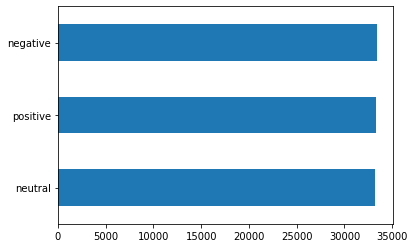

In [3]:
# Local directory
Reviewdata = pd.read_csv('/content/gdrive/MyDrive/thesis/train.csv', encoding='latin-1')
Reviewdata = Reviewdata.dropna()
count = Reviewdata.isnull().sum().sort_values(ascending=False)
percentage = ((Reviewdata.isnull().sum()/len(Reviewdata)*100)).sort_values(ascending=False)
missing_data = pd.concat([count, percentage], axis=1,
keys=['Count','Percentage'])
# print(Reviewdata['sentiment'].value_counts())
Reviewdata['sentiment'].value_counts().sort_values().plot(kind = 'barh')
plt.show() 

In [4]:
# Apply first level cleaning
import re
import string

#This function converts to lower-case, removes square bracket, removes numbers and punctuation
def text_clean(text):
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

cleaned = lambda x: text_clean(x)
Reviewdata['cleaned_description'] = pd.DataFrame(Reviewdata.selected_text.apply(cleaned))
Reviewdata.head(10)

,selected_text,sentiment,cleaned_description
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",negative,switchfoot Awww thats a bummer You shoulda ...
1,is upset that he can't update his Facebook by ...,negative,is upset that he cant update his Facebook by t...
2,@Kenichan I dived many times for the ball. Man...,negative,Kenichan I dived many times for the ball Manag...
3,my whole body feels itchy and like its on fire,negative,my whole body feels itchy and like its on fire
4,"@nationwideclass no, it's not behaving at all....",negative,nationwideclass no its not behaving at all im ...
5,@Kwesidei not the whole crew,negative,Kwesidei not the whole crew
6,Need a hug,negative,Need a hug
7,@LOLTrish hey long time no see! Yes.. Rains a...,negative,LOLTrish hey long time no see Yes Rains a bit...
8,@Tatiana_K nope they didn't have it,negative,TatianaK nope they didnt have it
9,@twittera que me muera ?,negative,twittera que me muera


In [5]:
def extract_emojis(s):
	tweet = emoji.demojize(s)
	tweet = tweet.replace(":"," ")
	tweet = ' '.join(tweet.split())
	return tweet

# Let's take a look at the updated text
Reviewdata['cleaned_description_new'] = pd.DataFrame(Reviewdata['cleaned_description'].apply(cleaned))
Reviewdata['sentiment'] = LabelEncoder().fit_transform(Reviewdata['sentiment'])
# Reviewdata['sentiment'].plot(kind="bar")

In [6]:
Reviewdata['sentiment'] = LabelEncoder().fit_transform(Reviewdata['sentiment'])

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

Independent_var = Reviewdata.cleaned_description_new
Dependent_var = Reviewdata.sentiment

IV_train, IV_test, DV_train, DV_test = train_test_split(Independent_var, Dependent_var, test_size = 0.25, random_state = 225)

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

tvec = TfidfVectorizer()

from sklearn.pipeline import Pipeline

IV_train, IV_test, DV_train, DV_test = model_selection.train_test_split(Independent_var, Dependent_var, test_size=0.25, random_state=109)

In [8]:
dt_clf = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
max_features=None, max_leaf_nodes=None,
min_impurity_split=1e-07, min_samples_leaf=1,
min_samples_split=2, min_weight_fraction_leaf=0.0,
presort=False, random_state=None, splitter='best')

dt_model = Pipeline([('vectorizer',tvec),('classifier',dt_clf)])

In [9]:
# Train Decision Tree Classifer
dt_model.fit(IV_train, DV_train)
filename = 'dt_model.sav'
pickle.dump(dt_model, open(filename, 'wb'))

predictions = dt_model.predict(IV_test)
print("DT Confusion Matrix: ", confusion_matrix(predictions, DV_test)) 

/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)


DT Confusion Matrix:  [[4737  911 2179]
 [1524 6634 1640]
 [2073  761 4529]]


In [10]:
print ("DT Accuracy : ", 
accuracy_score(predictions,DV_test)*100) 

DT Accuracy :  63.63054266047703


In [11]:
print("DT Report : ", 
classification_report(predictions, DV_test))

DT Report :                precision    recall  f1-score   support

           0       0.57      0.61      0.59      7827
           1       0.80      0.68      0.73      9798
           2       0.54      0.62      0.58      7363

    accuracy                           0.64     24988
   macro avg       0.64      0.63      0.63     24988
weighted avg       0.65      0.64      0.64     24988



In [13]:
scoring = 'accuracy'
kfold = model_selection.KFold(n_splits=10, random_state=7, shuffle=True)
results = model_selection.cross_val_score(dt_model, Independent_var, Dependent_var, cv=kfold, scoring=scoring)

/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It wi

In [14]:
print("Accuracy: %.3f (%.3f)" % (results.mean(), results.std())*100)

Accuracy: 0.659 (0.005)Accuracy: 0.659 (0.005)Accuracy: 0.659 (0.005)Accuracy: 0.659 (0.005)Accuracy: 0.659 (0.005)Accuracy: 0.659 (0.005)Accuracy: 0.659 (0.005)Accuracy: 0.659 (0.005)Accuracy: 0.659 (0.005)Accuracy: 0.659 (0.005)Accuracy: 0.659 (0.005)Accuracy: 0.659 (0.005)Accuracy: 0.659 (0.005)Accuracy: 0.659 (0.005)Accuracy: 0.659 (0.005)Accuracy: 0.659 (0.005)Accuracy: 0.659 (0.005)Accuracy: 0.659 (0.005)Accuracy: 0.659 (0.005)Accuracy: 0.659 (0.005)Accuracy: 0.659 (0.005)Accuracy: 0.659 (0.005)Accuracy: 0.659 (0.005)Accuracy: 0.659 (0.005)Accuracy: 0.659 (0.005)Accuracy: 0.659 (0.005)Accuracy: 0.659 (0.005)Accuracy: 0.659 (0.005)Accuracy: 0.659 (0.005)Accuracy: 0.659 (0.005)Accuracy: 0.659 (0.005)Accuracy: 0.659 (0.005)Accuracy: 0.659 (0.005)Accuracy: 0.659 (0.005)Accuracy: 0.659 (0.005)Accuracy: 0.659 (0.005)Accuracy: 0.659 (0.005)Accuracy: 0.659 (0.005)Accuracy: 0.659 (0.005)Accuracy: 0.659 (0.005)Accuracy: 0.659 (0.005)Accuracy: 0.659 (0.005)Accuracy: 0.659 (0.005)Accuracy: 0

In [17]:
consumerKey = 'Y76b838VJixCT9coY5aVaFWRv'
consumerSecret = 'MWQiIs4rzY8zKySusGf6hPiLU8e3vAbJNV02lKi3FLhdfirUmT'
accessToken = '1266387212150566913-HS7RCIKe86EsZFmMVMjeOF3SWlvCY5'
accessTokenSecret = 'AnngLumAWhaKXw1avMXR8eWu1GUllVMrML1zQKy1poLBP'

# Create the authentication object
authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret) 
    
# Set the access token and access token secret
authenticate.set_access_token(accessToken, accessTokenSecret) 
    
# Creating the API object while passing in auth information
api = tweepy.API(authenticate, wait_on_rate_limit = True)

user_data = '%23'+'biden'

# Cache the stop words for speed 
cachedStopWords = stopwords.words("english")
posts = list()
for tweet in tweepy.Cursor(api.search, q=user_data, lang='en').items(500):
	posts.append(tweet.text)

In [21]:
lemmatiser = WordNetLemmatizer()
list_posts = list()
for p in posts:
	temp = re.sub(' +', ' ', p).lower()
	temp = " ".join([lemmatiser.lemmatize(w) for w in temp.split(' ') if w not in cachedStopWords])
	temp = extract_emojis(temp)
	temp = text_clean(temp)
	list_posts.append(temp)
# print(list_posts)
df = pd.DataFrame([list_post for list_post in list_posts], columns=['Tweets'])

# Show the first 5 rows of data
df.head()

# Clean the tweets
df['Tweets'] = df['Tweets'].apply(text_clean)


In [22]:
# Create a function to get the polarity
def getPolarity(text):
	example = [text]
	result = dt_model.predict(example)
	if result==1:
		result = 'neutral'
	if result==2:
		result = 'positive'
	if result==0:
		result = 'negative'
	return result

# # Create two new columns 'Subjectivity' & 'Polarity'
df['Polarity'] = df['Tweets'].apply(getPolarity)

In [23]:
df

,Tweets,Polarity
0,biden would wrong think netanyahus potential s...,negative
1,snowden thinkingface do give home russia assis...,neutral
2,biden harris you suck and people cut line ever...,positive
3,rt coachblade state really problem if tras ins...,neutral
4,rt drjasonjohnson cant believe biden went fron...,negative
...,...,...
495,dailycaller always racist ppl but it’s white s...,negative
496,rt ellymelly least safely say old biden,positive
497,biden utmost best tear america apart cnn msnbc...,positive
498,rt chinamerlegal thehill adorable always would...,positive
